In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

In [4]:
# Dataset path
path='./data/hmnist_28_28_RGB.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [5]:
df.label.value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [6]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [7]:
print(len(train_set))

8012


In [8]:
print(len(test_set))

2003


In [9]:
df.label.unique()

array([4, 0, 6, 1, 2, 5, 3], dtype=int64)

In [10]:
classes={0:('Actinic keratoses (Cancer)'),
         1:('Basal cell carcinoma (Cancer)'),
         2:('Benign keratosis (Non-Cancerous)'),
         3:('Dermatofibroma (Non-Cancerous)'),
         4:('Melanocytic nevi (Non-Cancerous)'),
         5:('Vascular lesions (Can lead to cancer)'),
         6:('Melanoma (Cancer)')}


In [11]:
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])
y_test = test_set['label']
x_test = test_set.drop(columns=['label'])


In [12]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

c:\Users\saifa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

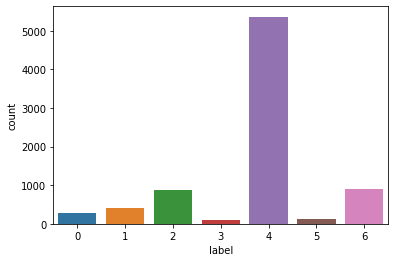

In [13]:
sns.countplot(train_set['label'])

In [14]:
for k in range(7):
  print("Number of ", classes[k],"images: ", len([i for i in y_train if i==k]))

Number of  Actinic keratoses (Cancer) images:  5364
Number of  Basal cell carcinoma (Cancer) images:  5364
Number of  Benign keratosis (Non-Cancerous) images:  5364
Number of  Dermatofibroma (Non-Cancerous) images:  5364
Number of  Melanocytic nevi (Non-Cancerous) images:  5364
Number of  Vascular lesions (Can lead to cancer) images:  5364
Number of  Melanoma (Cancer) images:  5364


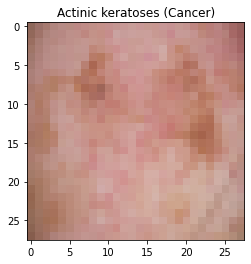

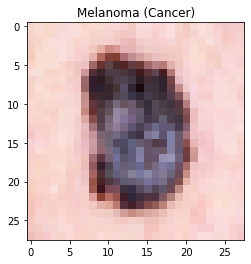

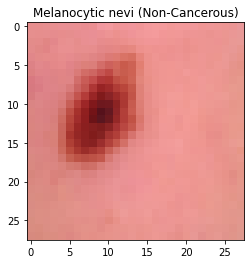

In [15]:
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
for _ in range(3):
  num = random.randint(0, 8000)
  plt.imshow(x_train[num].reshape(28, 28, 3))
  plt.title(classes[y_train[num]])
  plt.show()


In [16]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0

In [17]:
#Checkpoint
callback = tf.keras.callbacks.ModelCheckpoint('./model/Checkpoints/model{epoch:3d}.hdf5', monitor='val_accuracy', mode='auto', verbose=0, save_best_only=True)


In [18]:
Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
235/235 [==============================] - 33s 131ms/step - loss: 1.1814 - accuracy: 0.5766 - val_loss: 3.9872 - val_accuracy: 0.0138
Epoch 2/50
235/235 [==============================] - 29s 125ms/step - loss: 0.3884 - accuracy: 0.8722 - val_loss: 1.7367 - val_accuracy: 0.4051
Epoch 3/50
235/235 [==============================] - 29s 125ms/step - loss: 0.2411 - accuracy: 0.9179 - val_loss: 0.9324 - val_accuracy: 0.5842
Epoch 4/50
235/235 [==============================] - 29s 125ms/step - loss: 0.1898 - accuracy: 0.9344 - val_loss: 0.6054 - val_accuracy: 0.7402
Epoch 5/50
235/235 [==============================] - 29s 126ms/step - loss: 0.1536 - accuracy: 0.9470 - val_loss: 1.2806 - val_accuracy: 0.4639
Epoch 6/50
235/235 [==============================] - 30s 128ms/step - loss: 0.1228 - accuracy: 0.9571 - val_loss: 0.8572 - val_accuracy: 0.6160
Epoch 7/50
235/235 [==============================] - 30s 126ms/step - loss: 0.1079 - accuracy: 0.9622 - val_loss: 0.5706 - val_ac

In [19]:
# model.save_weights('./model/model.h5')    # save model

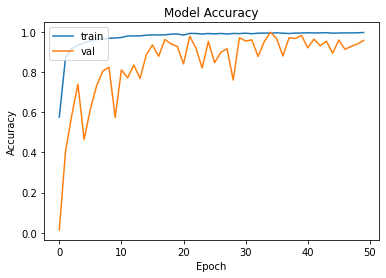

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

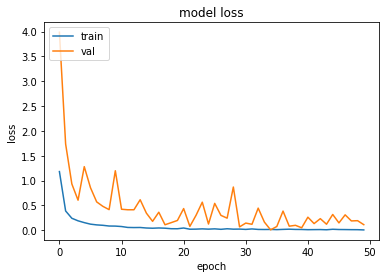

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
model.load_weights('./model/model.h5')

In [23]:
x_test = np.array(x_test).reshape(-1, 28, 28, 3)
loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.8070 - accuracy: 0.7214 - 788ms/epoch - 13ms/step


In [24]:
import PIL
img = PIL.Image.open('./data/Test_Img/c1.jpg')
img = img.resize((28, 28))
img = np.array(img).reshape(-1, 28, 28, 3)
result = model.predict(img)

# result
result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])
print("Confidence: ", max(result[0])*100,"%")

1/1 [==============================] - 0s 240ms/step
Melanoma (Cancer)
Confidence:  99.8879611492157 %
